In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import seaborn as sns 

In [10]:
#importing data from excel
data_csv = pd.read_csv('fuel_ferc1.csv')
data_csv.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2000_12_186_0_1,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [11]:
#Checking for missing Values
data_csv.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [15]:
#use groupby to count the sum of each unique value in the fuel unit column
data_csv.groupby( 'fuel_unit' )[ 'fuel_unit' ].count()
data_csv[[ 'fuel_unit' ]] = data_csv[[ 'fuel_unit' ]].fillna(value= 'ton' )

In [16]:
#Examine if missing value has been filled
data_csv.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [14]:
data_csv.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29523,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2000_12_186_0_1,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11534,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [18]:
data_csv.groupby( 'report_year' )[ 'report_year' ].count()

report_year
1994    1235
1995    1201
1996    1088
1997    1094
1998    1107
1999    1050
2000    1373
2001    1356
2002    1205
2003    1211
2004    1192
2005    1269
2006    1243
2007    1264
2008    1228
2009    1222
2010    1261
2011    1240
2012    1243
2013    1199
2014    1171
2015    1093
2016    1034
2017     993
2018     951
Name: report_year, dtype: int64

In [19]:
data_csv.groupby( 'fuel_type_code_pudl' ).first()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


In [20]:
data_csv.groupby( 'report_year' ).first()

,record_id,utility_id_ferc1,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
report_year,,,,,,,,,,
1994,f1_fuel_1994_12_1_0_7,1,rockport,coal,ton,5377489.0,16.590000,18.590,18.530,1.1210
1995,f1_fuel_1995_12_200_0_1,200,aroostook valley,waste,ton,327060.0,0.004500,0.000,13.150,1.4600
1996,f1_fuel_1996_12_204_0_1,204,seabrook,nuclear,gramsU,34.0,0.000006,26.381,0.000,0.0000
1997,f1_fuel_1997_12_1_0_7,1,rockport total aeg,coal,ton,5043970.0,16.752000,19.369,19.070,1.1560
1998,f1_fuel_1998_12_1_0_7,1,rockport total aeg,coal,ton,4965881.0,17.198000,19.282,19.338,1.1260
1999,f1_fuel_1999_12_141_0_1,141,boardman,coal,ton,2118951.0,18.052000,20.043,20.054,1.1100
2000,f1_fuel_2000_12_141_0_1,141,boardman,coal,ton,2084751.0,17.034000,19.225,19.293,1.1290
2001,f1_fuel_2001_12_195_0_1,195,pulliam 3,coal,ton,55679.0,17.638000,20.560,19.380,1.1560
2002,f1_fuel_2002_12_195_0_1,195,pulliam 3,coal,ton,82877.0,17.456000,19.410,17.070,1.1020


In [22]:
fuel_df1 =data_csv.iloc[ 0 : 19000 ].reset_index(drop= True )
fuel_df2 =data_csv.iloc[ 19000 :].reset_index(drop= True )
print fuel_df1

                      record_id  utility_id_ferc1  report_year  \
0         f1_fuel_1994_12_1_0_7                 1         1994   
1        f1_fuel_1994_12_1_0_10                 1         1994   
2         f1_fuel_1994_12_2_0_1                 2         1994   
3         f1_fuel_1994_12_2_0_7                 2         1994   
4        f1_fuel_1994_12_2_0_10                 2         1994   
5        f1_fuel_1994_12_2_0_13                 2         1994   
6         f1_fuel_1994_12_2_1_1                 2         1994   
7        f1_fuel_1994_12_2_1_10                 2         1994   
8        f1_fuel_1994_12_2_2_10                 2         1994   
9         f1_fuel_1994_12_4_0_1                 4         1994   
10        f1_fuel_1994_12_4_0_2                 4         1994   
11        f1_fuel_1994_12_4_0_4                 4         1994   
12        f1_fuel_1994_12_4_0_5                 4         1994   
13        f1_fuel_1994_12_6_0_1                 6         1994   
14        

In [26]:
#Concatenation is performed with the concat() function
data_to_concat= data_csv
pd.concat([data_csv, data_to_concat]).reset_index(drop= True )

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590000,18.590,18.530,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592000,18.580,18.530,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130000,39.720,38.120,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950000,47.210,45.990,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000000,2.770,2.770,2.570
5,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933.0,23.922000,44.240,43.250,1.850
6,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,nuclear,kgU,2260.0,0.064094,28.770,0.000,0.450
7,f1_fuel_1994_12_2_1_10,2,1994,resondent's portion,coal,ton,5372133.0,24.840000,58.540,55.130,2.360
8,f1_fuel_1994_12_2_2_10,2,1994,respondent's portion,coal,ton,817520.0,24.290000,33.970,34.650,1.400
9,f1_fuel_1994_12_4_0_1,4,1994,units 1-3,coal,ton,1471233.0,22.484000,28.730,28.110,1.278


In [27]:
#check for duplicate rows
data_csv.duplicated().any()

False

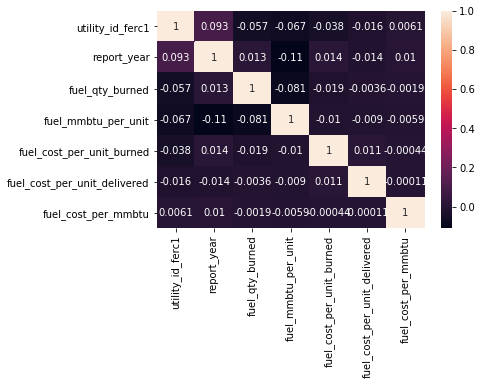

In [30]:
#DATA correlation
sns.heatmap(data_csv.corr(), annot=True)

Text(0.5,0,' Timeplot ')

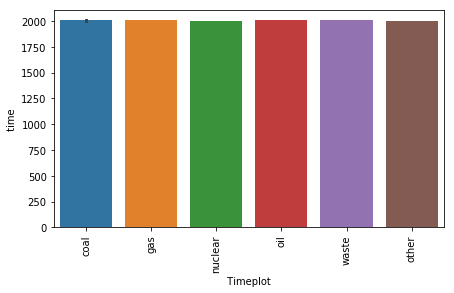

In [40]:
#Data Visualization
plt.figure(figsize=( 7 , 4 ))
plt.xticks(rotation= 90 )
sns.barplot(data=data_csv, x= 'fuel_type_code_pudl' , y= 'report_year' )
plt.xlabel( 'data_csv' )
#The timeplot of the fuel data
timeplot= sns.barplot(data=data_csv, x= 'fuel_type_code_pudl' , y= 'report_year')
timeplot.set_ylabel(" time ")
plt.xlabel(' Timeplot ')

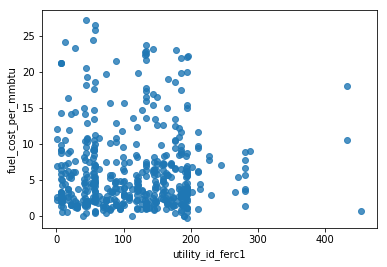

In [41]:
# Obtaining sample from Data to plot the regression line
sample_df = data_csv.sample(n= 500 , random_state= 5 )
sns.regplot(x=sample_df[ "utility_id_ferc1" ], y=sample_df[ "fuel_cost_per_mmbtu" ],
fit_reg= False )

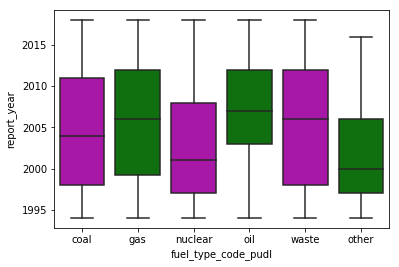

In [43]:
#Test for equality of variances using Boxplot
# Box plot
sns.boxplot(x="fuel_type_code_pudl", y="report_year",
palette=["m", "g"], data=data_csv)